### Project :- Rock VS Mine 
   1. Rock :- The hard, solid material that forms part of the surface of the earth
   2. Mine:- A bomb that is hidden under the ground or under water and explodes when somebody/something touches it

In [1]:
#importing the necessary libraries 
import numpy as np
from matplotlib import pyplot
import pandas as pd
from pandas import read_csv, set_option
#from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

### Data Collection , Data Pre-Processing 

In [2]:
sonar_data= pd.read_csv("sonar data.csv", header=None)
#with the help of header=none , we are accessing features/columns by its number series :1,2,...60.

In [3]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [5]:
#here we are splitting the dependent and independent features in X and Y labels
# In X we are dropping the column no 60 which is categorical feature as well as dependent feature
# as we know that 60 th column is dependent feature , targeted feautre , so we are coping it into Y 
X= sonar_data.drop(columns=60,axis=1)
Y= sonar_data[60]

In [6]:
#CHECKING SHAPE that X contains all numerical features as well as independent features 
print(X)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

In [7]:
#checking the shape of Y , it contains only dependent features or you can say that targeted feature
print(Y)

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object


In [8]:
#now we are spliting both dependent AND independent features into train test split 
#stratify means distribute both rock and mine into equal parts in train and test 
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.1, stratify=Y, random_state=1)

In [9]:
print(X_train.shape, Y_test.shape, Y_train.shape)

(187, 60) (21,) (187,)


In [10]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesClassifier
selection = ExtraTreesClassifier()
selection.fit(X,Y)

ExtraTreesClassifier()

In [11]:
print(selection.feature_importances_)

[0.01594176 0.01173686 0.00865006 0.01845109 0.01084644 0.01168021
 0.00858339 0.01369293 0.02945669 0.03127819 0.04635844 0.04880919
 0.01916755 0.0098183  0.01270799 0.01385831 0.01913801 0.01416681
 0.01330519 0.0212646  0.02745468 0.01495652 0.01485343 0.01138871
 0.01019291 0.01278013 0.02032684 0.01743875 0.01392938 0.00938808
 0.0173961  0.01123263 0.01160551 0.01246915 0.01832232 0.02931801
 0.02207542 0.01255263 0.01411322 0.01316516 0.0100853  0.01183293
 0.01522186 0.02176292 0.02373829 0.0194361  0.02434454 0.02368207
 0.02653168 0.0082185  0.01617551 0.01414826 0.0100202  0.01300228
 0.01034072 0.01086074 0.01037882 0.01387223 0.01143642 0.01103904]


#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

observation: as we can see that, 11 th feature affect target feature most

# NOTE:- 
Here if we are training our dataset on any random model then you can see the accuracy of model, and if we check by testing in which model our dataset is getting higher accuracy . 

1. Now first we will use random,  model evaluation , and we will fit our dataset on to that model , and check the accuracy our dataset will get.
2. Then we will try the second method which is to check  in which model our dataset is having higher accuracy, then we will fit into that model .

## Model Evaluation

## Model Training --> Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
#here we are using logistic regression because we have the scenerio of yes or no --> rock or mine, logistic regression is basically is for these kind of cases  

In [13]:

model.fit(X_train, Y_train)

LogisticRegression()

In [14]:
from sklearn.metrics import accuracy_score

X_train_predict= model.predict(X_train)
training_data_accuracy =accuracy_score(X_train_predict, Y_train)
#we use metrics for model evaluation, (means checking whether our model is giving us gud accuracy or not)
# here we did is :, we are predicting on training data, and checking the accuract on training data ,
# after gud accuracy on training data we apply it on test data, that it gives us gud accuracy or not


In [15]:
print("accuracy score on training data is : ", training_data_accuracy)
#as here on traning data it is giving us gud accuracy , so now we apply on test also 

accuracy score on training data is :  0.8342245989304813


In [16]:
#accuracy score on test data 
 

X_test_predict= model.predict(X_test)
test_data_accuracy =accuracy_score(X_test_predict, Y_test)

In [17]:
print("accuracy score on test data is : ", test_data_accuracy)
# we can see that it is giving us accuracy score of 76 on test data

accuracy score on test data is :  0.7619047619047619


## as we can see that this model is giving us the accuracy of 76% 
-->see if we fit our dataset into that model 

In [18]:

input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a mine')

['M']
The object is a mine


### Try second method , model selection , try to fit in some model, the which model gives us the higher the accuracy, we predict using that. 

## Model Selection 

In [19]:
# TEST OPTIONS
num_folds=10
seed=7
scoring='accuracy'

In [20]:
# spot check some algorithms
models=[]
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [21]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.770760 (0.085380)
LDA: 0.733333 (0.090679)
KNN: 0.775439 (0.100347)
CART: 0.743567 (0.090521)
NB: 0.685088 (0.093841)
SVM: 0.764620 (0.076195)


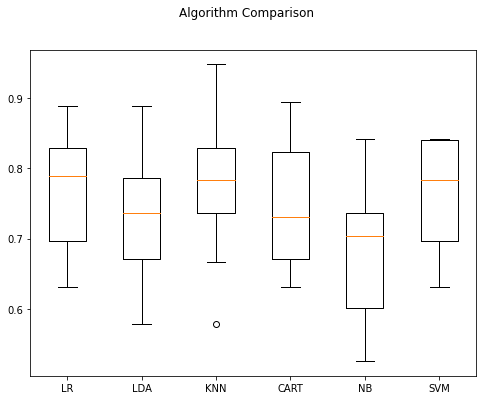

In [22]:
# compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,6)
pyplot.show()

In [23]:
# standardized the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))

In [24]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.743567 (0.102648)
ScaledLDA: 0.733333 (0.090679)
ScaledKNN: 0.811404 (0.087106)
ScaledCART: 0.712281 (0.101989)
ScaledNB: 0.685088 (0.093841)
ScaledSVM: 0.817836 (0.076896)


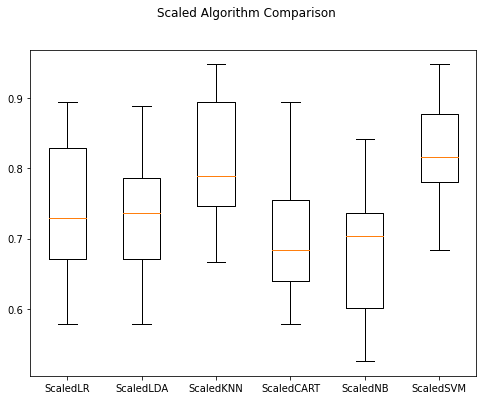

In [25]:
# compare scaled algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,6)
pyplot.show()

### observation: Algorith Tuning: KNN and SVM show as the most promising options
after seeing the boxplot and kfold setting 

In [26]:

# KNN algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [27]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.834503 using {'n_neighbors': 1}
#1 0.834503 (0.072290) with: {'n_neighbors': 1}
#2 0.823392 (0.068100) with: {'n_neighbors': 3}
#3 0.816959 (0.079101) with: {'n_neighbors': 5}
#4 0.769591 (0.089455) with: {'n_neighbors': 7}
#5 0.741813 (0.127346) with: {'n_neighbors': 9}
#6 0.731579 (0.121074) with: {'n_neighbors': 11}
#8 0.715205 (0.155737) with: {'n_neighbors': 13}
#7 0.716082 (0.104041) with: {'n_neighbors': 15}
#11 0.705848 (0.092207) with: {'n_neighbors': 17}
#10 0.711404 (0.078285) with: {'n_neighbors': 19}
#9 0.711404 (0.088264) with: {'n_neighbors': 21}


Parameters of SVM are C and kernel. Try a number of kernels with various values of C with less bias and more bias (less than and greater than 1.0 respectively

In [28]:
# SVM algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [29]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.849415 using {'C': 1.7, 'kernel': 'rbf'}
#11 0.780994 (0.063450) with: {'C': 0.1, 'kernel': 'linear'}
#40 0.546199 (0.155229) with: {'C': 0.1, 'kernel': 'poly'}
#39 0.603801 (0.179472) with: {'C': 0.1, 'kernel': 'rbf'}
#37 0.722515 (0.072116) with: {'C': 0.1, 'kernel': 'sigmoid'}
#21 0.753801 (0.072013) with: {'C': 0.3, 'kernel': 'linear'}
#38 0.653801 (0.159721) with: {'C': 0.3, 'kernel': 'poly'}
#19 0.754386 (0.087602) with: {'C': 0.3, 'kernel': 'rbf'}
#13 0.759942 (0.102426) with: {'C': 0.3, 'kernel': 'sigmoid'}
#14 0.759649 (0.075581) with: {'C': 0.5, 'kernel': 'linear'}
#36 0.722807 (0.115708) with: {'C': 0.5, 'kernel': 'poly'}
#9 0.781287 (0.074797) with: {'C': 0.5, 'kernel': 'rbf'}
#17 0.754678 (0.096875) with: {'C': 0.5, 'kernel': 'sigmoid'}
#25 0.743567 (0.097101) with: {'C': 0.7, 'kernel': 'linear'}
#23 0.749123 (0.120231) with: {'C': 0.7, 'kernel': 'poly'}
#10 0.780994 (0.072529) with: {'C': 0.7, 'kernel': 'rbf'}
#24 0.744152 (0.101013) with: {'C': 0.7, 'kernel': 'si

Right now SVM is proving the best with accuracy of 84.9% over KNN's best of 83.9%. (But what about variance? KNN seemed to indicate a tighter variance during spot checking).

Let's try some ensemble methods. No standardization on data this time. Because apparantly all four ensembles we are using are based on decision trees and thus are less sensitive to data distributions. 

In [30]:
# ensembles
ensembles = []
# Boosting methods
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))

In [31]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.850877 (0.087719)
GBM: 0.846199 (0.093313)
RF: 0.814035 (0.070129)
ET: 0.861111 (0.114918)


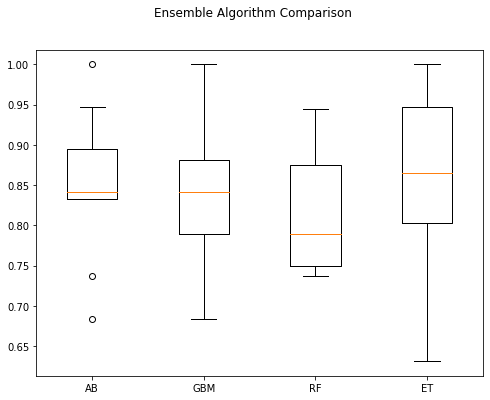

In [32]:
# compare ensemble algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,6)
pyplot.show()

GBM might be worthy of further study, but for now SVM shows a lot of promise as a low complexity and stable model for this problem.

Finalize Model with best parameters found during tuning step.

## prepare model

In [33]:

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5) # rbf is default kernel
model.fit(rescaledX , Y_train)

SVC(C=1.5)

In [34]:
# estimate accuracy on validation set
from pandas.plotting import scatter_matrix
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9047619047619048
[[10  1]
 [ 1  9]]
              precision    recall  f1-score   support

           M       0.91      0.91      0.91        11
           R       0.90      0.90      0.90        10

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



The accuracy on the validation set was 90.4%. Very high to our original estimates.

In [35]:
predictions

array(['M', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'R',
       'M', 'R', 'M', 'M', 'M', 'R', 'M', 'R'], dtype=object)

In [36]:
Y_test

113    M
23     R
45     R
81     R
82     R
109    M
176    M
134    M
96     R
98     M
57     R
169    M
13     R
204    M
10     R
161    M
7      R
172    M
68     R
102    M
106    M
Name: 60, dtype: object

## Testing model 

### Making Predictive System 

In [37]:

input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a mine')

['M']
The object is a mine
